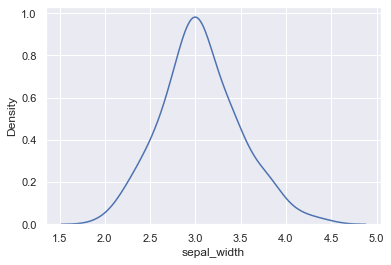

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.kdeplot(df['sepal_width'])
plt.show()

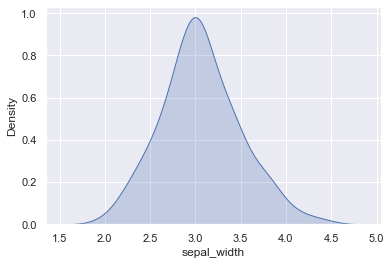

In [6]:
# 곡선 아래 영역에 음영 추가
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.kdeplot(df['sepal_width'],
            shade=True            # 음영 추가
            )

plt.show()

c:\Users\tjehd\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


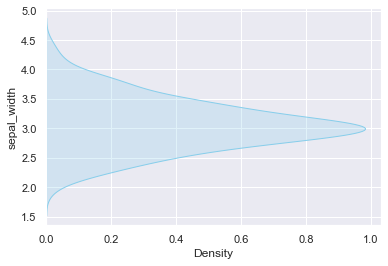

In [9]:
# 회전, 색상 번경
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.kdeplot(df['sepal_width'],
            shade=True,            # 음영 추가
            vertical=True,         # 회전
            color="skyblue"        # 색상 변경
            )
plt.show()

c:\Users\tjehd\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\Users\tjehd\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


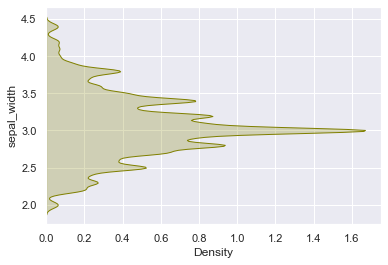

In [24]:
# 굴곡 조정
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.kdeplot(df['sepal_width'],
            shade=True,            # 음영 추가
            vertical=True,         # 회전
            color="olive",         # 색상 변경
            bw=0.1                 # 굴곡 조정
            )
plt.show()

c:\Users\tjehd\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\tjehd\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


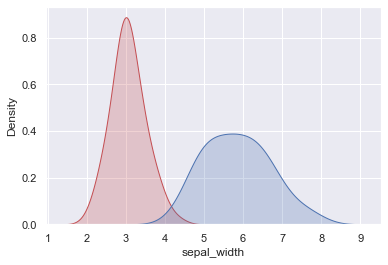

In [29]:
# 여러 변수의 밀도 플롯
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

fig = sns.kdeplot(df['sepal_width'],
                  shade=True,            # 음영 추가
                  #vertical=True,         # 회전
                  color="r",             # 색상 변경
                  bw=0.5                 # 굴곡 조정
                  )
fig1 = sns.kdeplot(df['sepal_length'],
                  shade=True,            # 음영 추가
                  #vertical=True,         # 회전
                  color="b",             # 색상 변경
                  bw=0.5                 # 굴곡 조정
                  )
plt.show()

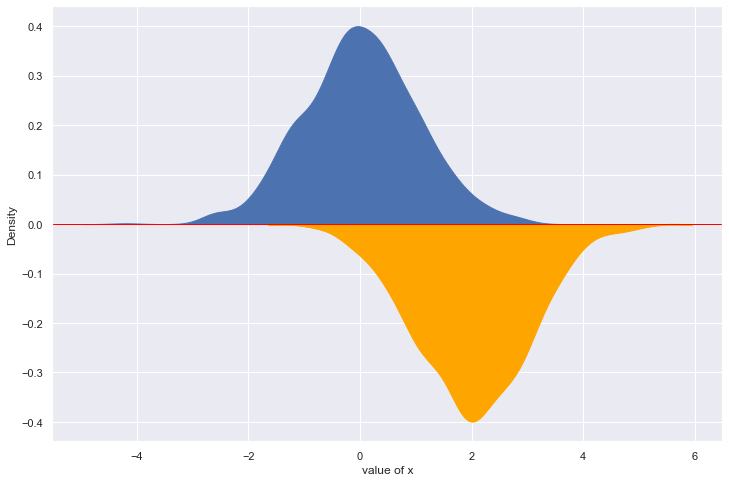

In [37]:
# 미러 밀도 차트
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import gaussian_kde

# data
df = pd.DataFrame({
                    'var1' : np.random.normal(size=1000),
                    'var2' : np.random.normal(loc=2, size=1000) * -1
                    })
                    
# matplotlib.pylab의 rcParams 설정을 활용하면 차트의 크기와 선의 색, 두께 등의 기본 값을 설정할 수 있음
plt.rcParams["figure.figsize"]=12,8     # 그림(figure)의 크기 (가로, 세로)인치 단위

# var1에 대한 밀도차트
sns.kdeplot(x="var1",
            data=df,
            #shade=True,
            fill=True,
            alpha=1
            )

# var2에 대한 밀도차트
kde = gaussian_kde(df.var2)
x_range = linspace(min(df.var2), max(df.var2), len(df.var2))

# 미러차트
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange')
plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange')

# 
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-', linewidth=1, color='red')

plt.show()

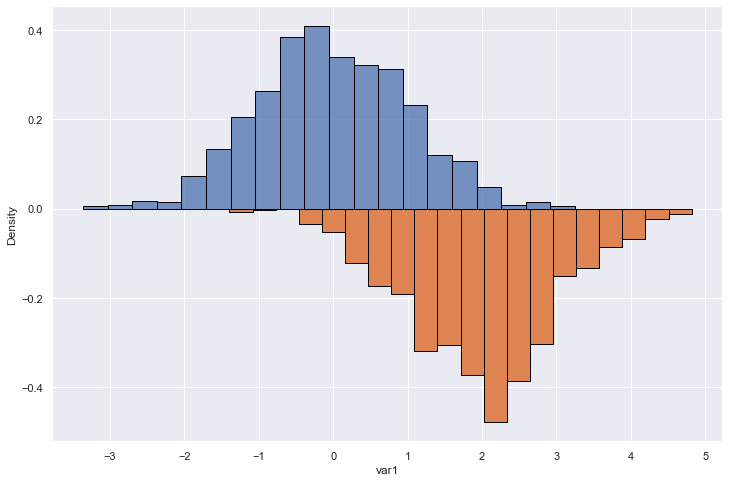

In [39]:
# 미러 밀도 차트
import numpy as np
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import gaussian_kde

# data
df = pd.DataFrame({
                    'var1' : np.random.normal(size=1000),
                    'var2' : np.random.normal(loc=2, size=1000) * -1
                    })
                    
# matplotlib.pylab의 rcParams 설정을 활용하면 차트의 크기와 선의 색, 두께 등의 기본 값을 설정할 수 있음
plt.rcParams["figure.figsize"]=12,8     # 그림(figure)의 크기 (가로, 세로)인치 단위

# var1 히스토그램
sns.histplot(x=df.var1,
             stat="density",
             bins=20,
             edgecolor='black'
             )

# var2 히스토그램
n_bins = 20
heights, bins = np.histogram(df.var2,
                             density=True,
                             bins=n_bins
                             )
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos = (bins[:-1] + bin_width / 2) * -1

plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

plt.show()

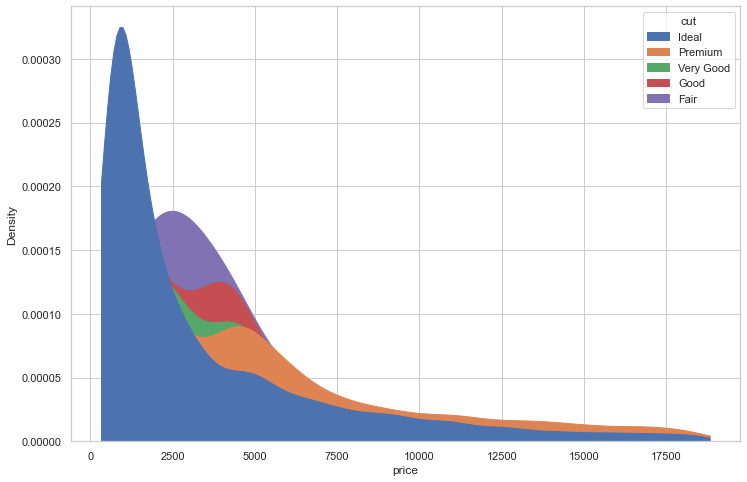

In [5]:
# 여러 그룹이 있는 밀도 차트
import seaborn as sns
import matplotlib.pyplot as plt
#from plotnine.data import diamonds

diamonds=sns.load_dataset('diamonds', cache=True, data_home=None)

plt.rcParams["figure.figsize"]=12, 8

sns.set(style="whitegrid")

sns.kdeplot(data=diamonds,
            x="price",
            hue="cut",              # 그룹
            cut=0,
            fill=True,
            common_norm=False,
            alpha=1
            )
plt.show()

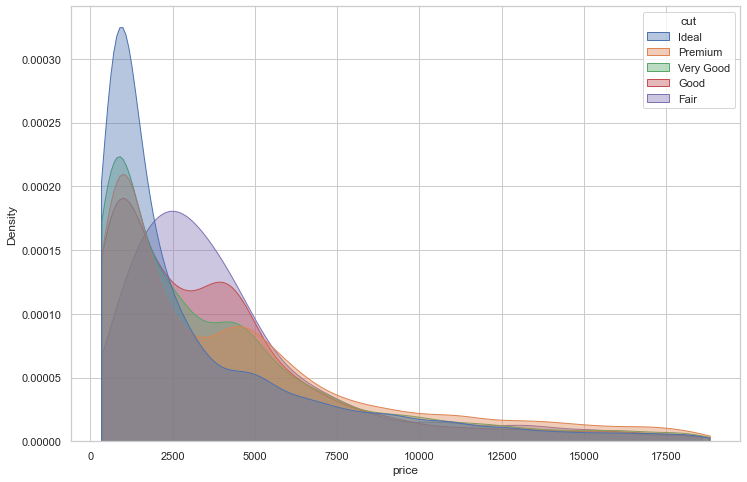

In [7]:
# 여러 그룹이 있는 밀도 차트
import seaborn as sns
import matplotlib.pyplot as plt
#from plotnine.data import diamonds

diamonds=sns.load_dataset('diamonds', cache=True, data_home=None)

plt.rcParams["figure.figsize"]=12, 8

sns.set(style="whitegrid")

sns.kdeplot(data=diamonds,
            x="price",
            hue="cut",              # 그룹
            cut=0,
            fill=True,
            common_norm=False,
            alpha=0.4               # 명암
            )
plt.show()

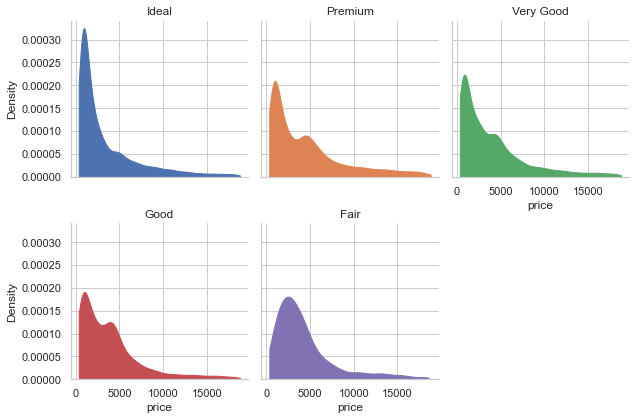

In [9]:
# 각각 밀도그래프 표현
import seaborn as sns
import matplotlib.pyplot as plt

diamonds=sns.load_dataset('diamonds', cache=True, data_home=None)

sns.set(style="whitegrid")

g = sns.FacetGrid(diamonds, col='cut', hue='cut', col_wrap=3)
g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g = g.set_titles("{col_name}")

plt.show()

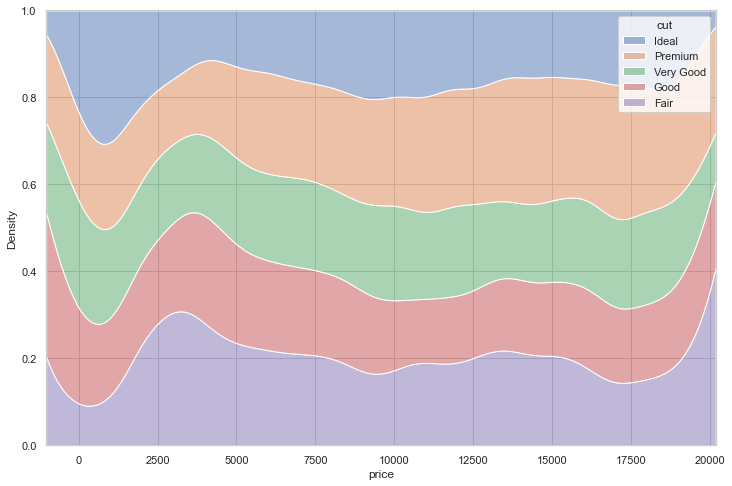

In [12]:
# 누적 밀도 차트
import seaborn as sns
import matplotlib.pyplot as plt

diamonds=sns.load_dataset('diamonds', cache=True, data_home=None)

sns.set(style="whitegrid")

sns.kdeplot(data=diamonds,
            x="price",
            hue="cut",
            common_norm=False,
            multiple="fill",
            alpha=0.5
            )

plt.show()